In [1]:
#Part 1 DS201_Exam2_MaddaliNeha

In [2]:
#q1 answer: Linear regression is being used because it has found a line that best fits the points plotted.
#The model also shows the error from the points and the line. The reason for using this specific model is to show the 
#relationship between the independent variable (advertising dollas) and the dependent variable (sales).

In [3]:
#q2 answer: the machine learning method of scikit-learn decision trees

In [4]:
#q3 answer: clf.predict([[...,...]]) will be the model that predicts "cateorical values"

In [5]:
#q4 answer: In the blue square because there are 5 red triangles and 6 blue squares

In [6]:
#q5 answer: An unsupervised learning model such as a neural network if there is no label in the dataset

In [7]:
#Part 2 DS201_Exam2_MaddaliNeha

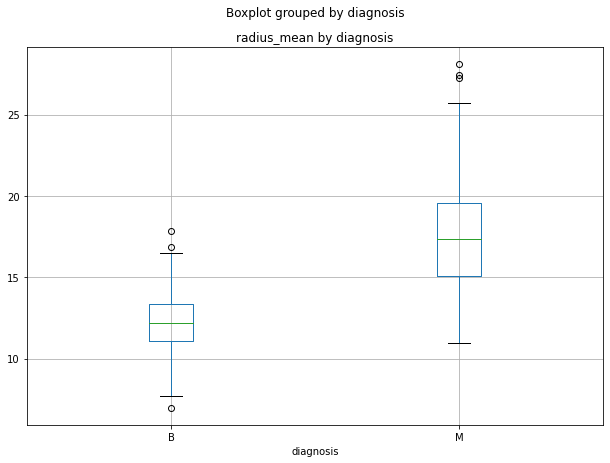

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#q6 answer:
df = pd.read_csv('BreastCancer_data.csv')
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df.boxplot(column = 'radius_mean', by = 'diagnosis', figsize = (10, 7))
plt.title('radius_mean by diagnosis')
plt.show()

In [9]:
#q7 answer:
import seaborn as sns
import numpy as np
df1 = df[['diagnosis', 'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean']]
sns.pairplot(df1, hue = 'diagnosis')
plt.show()

ModuleNotFoundError: No module named 'scipy.version'

In [ ]:
#q8 answer:
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# separate benign and malignant
benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']
p = figure(title = "Benign and Malignant texture_mean(Y) by area_mean(X) with size by Radius")
p.circle('area_mean', 'texture_mean', source = benign, color = 'green', size = 'radius_mean', legend = dict(value = 'Benign'),fill_alpha=.2)
p.triangle('area_mean', 'texture_mean', source = malignant, color = 'red', size = 'radius_mean', legend = dict(value = 'Malignant'), fill_alpha=.2)
p.legend.location = "top_left"
p.xaxis.axis_label = 'area_mean'
p.yaxis.axis_label = 'texture_mean'
show(p)

In [ ]:
#q9 answer:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean']]
Y = df[['diagnosis']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# print out the shape of X,y,X_train, X_test, Y_train,Y_test
print(X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# report Logistic Regression accuracy of X,Y -- accuracy of ~88.6%
log_reg_1 = LogisticRegression()
log_reg_1.fit(X, Y)
log_accuracy = log_reg_1.score(X_test, Y_test)
print(log_accuracy)

# report KNN accuracy of X,Y when k=5 -- accuracy of ~90.3%
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, Y)
preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_true = Y_test, y_pred = preds)
print(knn_accuracy)

# loop k1-k25 and plot KNN accuracy of X,Y
neighbours = list(range(1, 25))
score = []
for i in neighbours:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, Y_train)
    preds_neighbors = clf.predict(X_test)
    score.append(accuracy_score(y_true = Y_test, y_pred = preds_neighbors))
plt.plot(neighbours, score)
plt.xlabel('Value of K for KNN of X')
plt.ylabel('Testing Accuracy')
plt.show()